아이돌 얼굴인식 kNN알고리즘 코드와 운전자인식 kNN알고리즘 코드는 다르다.  
해당 파일은 운전자 얼굴인식 코드이다.

파이썬 가상환경에서 진행하였다.

1. 환경구축  
face_recognition 라이브러리를 설치 위해서는 cmake와 dlib를 먼저 설치해야한다.  
cmake는 pip install 이나 conda install 명령어로 설치할 수 있다.  
dlib는 가상환경 터미널에서 'conda install conda-forge dlib'라는 명령어로 설치할 수 있다.  
cmake와 dlib가 설치되었다면, pip install이나 conda install로 face_recognition 설치할 수 있다.  
2. dataset 검사  
얼굴인식이 되는 사진인지 검사한다 -> 얼굴이 인식되는 사진으로만 구성  
3. train


*dataset이 있는 경로와 train파일이 있는 경로가 같아야한다*  
*레퍼런스 : https://github.com/ageitgey/face_recognition , https://github.com/ageitgey/face_recognition/wiki/Calculating-Accuracy-as-a-Percentage*

# dataset 얼굴인식 확인

I found 2 face(s) in this photograph.
The chin in this face has the following points: [(1623, 330), (1627, 367), (1631, 402), (1641, 435), (1662, 463), (1691, 485), (1727, 503), (1763, 517), (1798, 519), (1823, 512), (1838, 489), (1848, 461), (1856, 435), (1859, 408), (1864, 380), (1865, 354), (1861, 330)] 

The left_eyebrow in this face has the following points: [(1685, 292), (1706, 274), (1733, 267), (1763, 269), (1787, 281)] 

The right_eyebrow in this face has the following points: [(1807, 282), (1822, 273), (1840, 270), (1856, 273), (1864, 286)] 

The nose_bridge in this face has the following points: [(1800, 308), (1805, 324), (1811, 340), (1817, 358)] 

The nose_tip in this face has the following points: [(1779, 380), (1794, 384), (1809, 387), (1820, 384), (1829, 379)] 

The left_eye in this face has the following points: [(1714, 314), (1729, 306), (1746, 306), (1758, 317), (1744, 320), (1728, 320)] 

The right_eye in this face has the following points: [(1813, 317), (1827, 307)

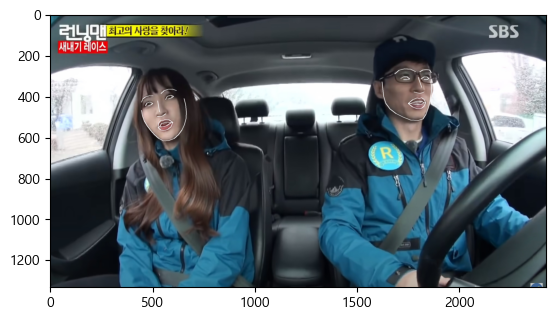

In [37]:
# 파일 1개 확인
from PIL import Image, ImageDraw
import face_recognition
import os
import matplotlib.pyplot as plt

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("C:\\Users\\user\\Desktop\\캡스톤_얼굴인식\\knn\\블랙박스\\test_재석\\재석test.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {} \n".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3)

# Show the picture
#pil_image.show()
plt.imshow(pil_image)

In [27]:
'''
    폴더안의 사진들 모두를 검사하고자 할 때
    
    train_dir : training 데이터가 있는 path
    person_dir : training 데이터 하위의 폴더(이름으로 구성)
    train
        ㄴperson1
            ㄴ001.jpg
            ㄴ002.jpg
        ㄴperson2
            ...
'''

from PIL import Image, ImageDraw
import face_recognition
import os
import matplotlib.pyplot as plt

# Load the jpg file into a numpy array
train_dir = "C:\\Users\\user\\Desktop\\캡스톤_얼굴인식\\knn\\블랙박스\\train_재석"
for person_name in os.listdir(train_dir):
    person_dir = train_dir+"\\{}".format(person_name)
    for i in os.listdir(person_dir):
        print(i)
        image = face_recognition.load_image_file(person_dir+'\\{}'.format(i))


        # Find all facial features in all the faces in the image
        face_landmarks_list = face_recognition.face_landmarks(image)

        print("I found {} face(s) in {} photograph.".format(len(face_landmarks_list),i))

        # Create a PIL imagedraw object so we can draw on the picture
        pil_image = Image.fromarray(image)
        d = ImageDraw.Draw(pil_image)

        for face_landmarks in face_landmarks_list:

            # Print the location of each facial feature in this image
            for facial_feature in face_landmarks.keys():
                print("The {} in this face has the following points: {} \n".format(facial_feature, face_landmarks[facial_feature]))

            # Let's trace out each facial feature in the image with a line!
            for facial_feature in face_landmarks.keys():
                d.line(face_landmarks[facial_feature], width=3)

        # Show the picture
        pil_image.show()
        #plt.imshow(pil_image)

KakaoTalk_20221129_224053503.jpg
I found 1 face(s) in KakaoTalk_20221129_224053503.jpg photograph.
The chin in this face has the following points: [(319, 123), (320, 136), (321, 151), (325, 165), (329, 179), (336, 191), (347, 202), (358, 210), (372, 213), (386, 211), (402, 204), (416, 195), (428, 183), (436, 169), (440, 153), (443, 135), (444, 119)] 

The left_eyebrow in this face has the following points: [(324, 103), (329, 95), (338, 93), (348, 93), (357, 96)] 

The right_eyebrow in this face has the following points: [(378, 96), (389, 91), (400, 90), (412, 93), (421, 101)] 

The nose_bridge in this face has the following points: [(368, 110), (367, 121), (366, 132), (366, 143)] 

The nose_tip in this face has the following points: [(357, 150), (362, 151), (367, 153), (374, 152), (380, 150)] 

The left_eye in this face has the following points: [(335, 115), (340, 111), (346, 111), (353, 115), (346, 116), (340, 116)] 

The right_eye in this face has the following points: [(387, 114), (

KakaoTalk_20221129_224053503_06.jpg
I found 2 face(s) in KakaoTalk_20221129_224053503_06.jpg photograph.
The chin in this face has the following points: [(910, 267), (912, 288), (914, 309), (920, 327), (932, 341), (949, 352), (968, 360), (987, 365), (1004, 367), (1018, 363), (1027, 353), (1034, 339), (1039, 325), (1043, 310), (1047, 295), (1048, 280), (1047, 266)] 

The left_eyebrow in this face has the following points: [(949, 247), (960, 237), (974, 231), (989, 231), (1001, 237)] 

The right_eyebrow in this face has the following points: [(1021, 237), (1029, 233), (1038, 233), (1045, 238), (1048, 246)] 

The nose_bridge in this face has the following points: [(1013, 252), (1016, 262), (1019, 271), (1022, 281)] 

The nose_tip in this face has the following points: [(1002, 296), (1009, 298), (1017, 299), (1022, 297), (1026, 295)] 

The left_eye in this face has the following points: [(964, 258), (973, 255), (981, 254), (988, 257), (981, 259), (973, 259)] 

The right_eye in this face ha

In [14]:
"""
This is an example of using the k-nearest-neighbors (KNN) algorithm for face recognition.

When should I use this example?
This example is useful when you wish to recognize a large set of known people,
and make a prediction for an unknown person in a feasible computation time.

Algorithm Description:
The knn classifier is first trained on a set of labeled (known) faces and can then predict the person
in an unknown image by finding the k most similar faces (images with closet face-features under euclidean distance)
in its training set, and performing a majority vote (possibly weighted) on their label.

For example, if k=3, and the three closest face images to the given image in the training set are one image of Biden
and two images of Obama, The result would be 'Obama'.

* This implementation uses a weighted vote, such that the votes of closer-neighbors are weighted more heavily.

Usage:

1. Prepare a set of images of the known people you want to recognize. Organize the images in a single directory
   with a sub-directory for each known person.

2. Then, call the 'train' function with the appropriate parameters. Make sure to pass in the 'model_save_path' if you
   want to save the model to disk so you can re-use the model without having to re-train it.

3. Call 'predict' and pass in your trained model to recognize the people in an unknown image.

NOTE: This example requires scikit-learn to be installed! You can install it with pip:

$ pip3 install scikit-learn

"""

import math
from sklearn import neighbors
import os
import os.path
import pickle
from PIL import Image, ImageDraw
import face_recognition
from face_recognition.face_recognition_cli import image_files_in_folder
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
import sys
import time

ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg'}


def train(train_dir,val_dir, model_save_path=None, n_neighbors=None, knn_algo='ball_tree', verbose=False):
    """
    Trains a k-nearest neighbors classifier for face recognition.

    :param train_dir: directory that contains a sub-directory for each known person, with its name.

     (View in source code to see train_dir example tree structure)

     Structure:
        <train_dir>/
        ├── <person1>/
        │   ├── <somename1>.jpeg
        │   ├── <somename2>.jpeg
        │   ├── ...
        ├── <person2>/
        │   ├── <somename1>.jpeg
        │   └── <somename2>.jpeg
        └── ...

    :param model_save_path: (optional) path to save model on disk
    :param n_neighbors: (optional) number of neighbors to weigh in classification. Chosen automatically if not specified
    :param knn_algo: (optional) underlying data structure to support knn.default is ball_tree
    :param verbose: verbosity of training
    :return: returns knn classifier that was trained on the given data.
    """
    X_train = []
    y_train = []
    X_val =[]
    y_val = []
    # Loop through each person in the training set
    for class_dir in os.listdir(train_dir):
        if not os.path.isdir(os.path.join(train_dir, class_dir)):
            continue

        # Loop through each training image for the current person
        for img_path in image_files_in_folder(os.path.join(train_dir, class_dir)):
            image = face_recognition.load_image_file(img_path)
            face_bounding_boxes = face_recognition.face_locations(image)

            if len(face_bounding_boxes) != 1:
                # If there are no people (or too many people) in a training image, skip the image.
                if verbose:
                    print("Image {} not suitable for training: {}".format(img_path, "Didn't find a face" if len(face_bounding_boxes) < 1 else "Found more than one face"))
            else:
                # Add face encoding for current image to the training set
                X_train.append(face_recognition.face_encodings(image, known_face_locations=face_bounding_boxes)[0])
                y_train.append(class_dir)
    
    # Loop through each person in the validation set
    for class_dir in os.listdir(val_dir):
        if not os.path.isdir(os.path.join(val_dir, class_dir)):
            continue

        # Loop through each training image for the current person
        for img_path in image_files_in_folder(os.path.join(val_dir, class_dir)):
            image = face_recognition.load_image_file(img_path)
            face_bounding_boxes = face_recognition.face_locations(image)

            if len(face_bounding_boxes) != 1:
                # If there are no people (or too many people) in a training image, skip the image.
                if verbose:
                    print("Image {} not suitable for validation: {}".format(img_path, "Didn't find a face" if len(face_bounding_boxes) < 1 else "Found more than one face"))
            else:
                # Add face encoding for current image to the training set
                X_val.append(face_recognition.face_encodings(image, known_face_locations=face_bounding_boxes)[0])
                y_val.append(class_dir)
    
    # Determine how many neighbors to use for weighting in the KNN classifier
    if n_neighbors is None:
        n_neighbors = int(round(math.sqrt(len(X))))
        if verbose:
            print("Chose n_neighbors automatically:", n_neighbors)

    # Create and train the KNN classifier
    knn_clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, algorithm=knn_algo, weights='distance')
    # training
    knn_clf.fit(X_train, y_train)
    # predict
    y_pred = knn_clf.predict(X_val)
    # accuracy
    scores = metrics.accuracy_score(y_val, y_pred)
    print("Accuracy_score : ",scores)
    
    #confusion matrix
    disp = metrics.plot_confusion_matrix(knn_clf, X_val, y_val)
    plt.show()
    print(f"{metrics.classification_report(y_val, y_pred)}\n")
    
    # Save the trained KNN classifier
    if model_save_path is not None:
        with open(model_save_path, 'wb') as f:
            pickle.dump(knn_clf, f)

    return knn_clf


def predict(train_dir,X_img_path, knn_clf=None, model_path=None, distance_threshold=0.4):
    """
    Recognizes faces in given image using a trained KNN classifier

    :param X_img_path: path to image to be recognized
    :param knn_clf: (optional) a knn classifier object. if not specified, model_save_path must be specified.
    :param model_path: (optional) path to a pickled knn classifier. if not specified, model_save_path must be knn_clf.
    :param distance_threshold: (optional) distance threshold for face classification. the larger it is, the more chance
           of mis-classifying an unknown person as a known one.
    :return: a list of names and face locations for the recognized faces in the image: [(name, bounding box), ...].
        For faces of unrecognized persons, the name 'unknown' will be returned.
    """
    if not os.path.isfile(X_img_path) or os.path.splitext(X_img_path)[1][1:] not in ALLOWED_EXTENSIONS:
        raise Exception("Invalid image path: {}".format(X_img_path))

    if knn_clf is None and model_path is None:
        raise Exception("Must supply knn classifier either thourgh knn_clf or model_path")

    # Load a trained KNN model (if one was passed in)
    if knn_clf is None:
        with open(model_path, 'rb') as f:
            knn_clf = pickle.load(f)

    # Load image file and find face locations
    X_img = face_recognition.load_image_file(X_img_path)
    X_face_locations = face_recognition.face_locations(X_img)

    # If no faces are found in the image, return an empty result.
    if len(X_face_locations) == 0:
        return []

    # Find encodings for faces in the test iamge
    faces_encodings = face_recognition.face_encodings(X_img, known_face_locations=X_face_locations)

    # Use the KNN model to find the best matches for the test face
    closest_distances = knn_clf.kneighbors(faces_encodings, n_neighbors=1)
    are_matches = [closest_distances[0][i][0] <= distance_threshold for i in range(len(X_face_locations))]
    
    known_face_encodings=[]

    for class_dir in os.listdir(train_dir):
        if not os.path.isdir(os.path.join(train_dir, class_dir)):
            continue
        # Loop through each training image for the current person
        for img_path in image_files_in_folder(os.path.join(train_dir, class_dir)):
            known_image = face_recognition.load_image_file(img_path)
            face_bounding_boxes = face_recognition.face_locations(known_image)
            try:
                known_face_encodings.append(face_recognition.face_encodings(known_image, known_face_locations=face_bounding_boxes)[0])
                
            except IndexError as e:
                print(e)
                sys.exit(1) # stops code execution in my case you could handle it differently
            
    
    image_to_test = face_recognition.load_image_file(X_img_path)
    image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]
    
    # See how far apart the test image is from the known faces
    face_distances = face_recognition.face_distance(known_face_encodings, image_to_test_encoding)
    
    # face_distance code
    global accuracy
    acc =[]
    accuracy={}
    
    # print문 주석처리해도 됨
    for i, face_distance in enumerate(face_distances):
        print("The test image has a distance of {:.2} from known image #{}".format(face_distance, i))
        #print("- With a normal cutoff of 0.6, would the test image match the known image? {}".format(face_distance < 0.6))
        #print("- With a very strict cutoff of 0.5, would the test image match the known image? {}".format(face_distance < 0.5))
        acc.append(face_distance_to_conf(face_distance))
        print()

    # 모든 사람에 대해 각자 traing 파일이 몇 개 있는지, 그 중에서 가장 높은 accuracy(가장 낮은 distance)를 구함
    start=0
    for person_name in os.listdir(train_dir):
        number_of_files = os.listdir(train_dir+'/{}'.format(person_name))
        temp = len(number_of_files)
        result = max(acc[start:start+temp])
        accuracy[person_name]=result
        start+=temp

    # Predict classes and remove classifications that aren't within the threshold
    return [(pred, loc) if rec else ("unknown", loc) for pred, loc, rec in zip(knn_clf.predict(faces_encodings), 
                                                                               X_face_locations, are_matches)]


def show_prediction_labels_on_image(img_path,train_dir, predictions):
    """
    Shows the face recognition results visually.

    :param img_path: path to image to be recognized
    :param predictions: results of the predict function
    :return:
    """
    pil_image = Image.open(img_path).convert("RGB")
    draw = ImageDraw.Draw(pil_image)
    
    cnt = 1
    pred_box = []
    global name
    for name, (top, right, bottom, left) in predictions:
        
        # image crop
        plt.figure(figsize=(2,2))
        img_cropped = pil_image.crop((left,top,right,bottom))
        plt.title(name)
        plt.imshow(img_cropped)
        
        # Draw a box around the face using the Pillow module
        draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))
   
        
        # There's a bug in Pillow where it blows up with non-UTF-8 text
        # when using the default bitmap font
        encoded_name = name.encode("UTF-8")
        
        # Draw a label with a name below the face
        text_width, text_height = draw.textsize(encoded_name)

        if name == 'unknown':
            draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill="red", outline="red")
            draw.text((left + 6, bottom - text_height - 5), encoded_name, fill=(255, 255, 255, 255))

        else :
            draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
            draw.text((left + 6, bottom - text_height - 5), encoded_name, fill=(255, 255, 255, 255))
            
            # Draw a accuracy below the face(소수점 4번째자리까지_5번째에서 반올림)
            result = accuracy[str(name)]
            print(result)
            draw.text((right+5,bottom-text_height-5),str(round(result,4)),fill="red")
            
            #운전자확인
            #운전자 확인시에만 활성화
            pred_box = [left, top, right, bottom]
            img = pil_image.copy()
            draw2 = ImageDraw.Draw(img)
            x = img.size[0]
            y = img.size[1]
            draw2.rectangle((x//2,0,x,y), outline=(0,255,0), width = 10)
            if cnt>=2: # 운전자 얼굴을 여러명으로 잘못 인식했을 때, 아래 코드 실행x
                print("{}로 인식한 사람이 {}명입니다".format(name,cnt))
            else:
                if (pred_box[0]>=x//2) and (pred_box[1]>=0) and (pred_box[2]<=x) and (pred_box[3]<=y):
                    print("{}은 운전자가 맞습니다".format(name))
                else :
                    print("{}은 운전자가 아닙니다".format(name))
            cnt+=1

    # Save the resulting image
    save_path = 'C:\\Users\\user\\Desktop\\캡스톤_얼굴인식\\knn\\블랙박스\\'
    pil_image.save(save_path+"결과_재석.jpg")
    
    # Display the resulting image
    #pil_image.show()

    #한글폰트지정
    matplotlib.rcParams['font.family'] ='Malgun Gothic'
    matplotlib.rcParams['axes.unicode_minus'] =False
    # Display the resulting image
    fig = plt.figure(figsize=(20,10))

    ax1 = fig.add_subplot(2,1,1) #행, 열
    ax1.set_title('탑승자 얼굴인식')
    #pil_image.show()
    ax1.imshow(pil_image)
    try:
        #img.show()
        ax2 = fig.add_subplot(2,1,2)
        ax2.set_title('운전자 얼굴인식')
        ax2.imshow(img)
    except :
        print('운전자가 없습니다.')

# Calculating Accuracy as a Percentage
import math

def face_distance_to_conf(face_distance, face_match_threshold=0.6):
    if face_distance > face_match_threshold:
        range = (1.0 - face_match_threshold)
        linear_val = (1.0 - face_distance) / (range * 2.0)
        return linear_val
    else:
        range = face_match_threshold
        linear_val = 1.0 - (face_distance / (range * 2.0))
        return linear_val + ((1.0 - linear_val) * math.pow((linear_val - 0.5) * 2, 0.2))

Training KNN classifier...
Accuracy_score :  1.0


C:\Users\user\anaconda3\envs\knn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


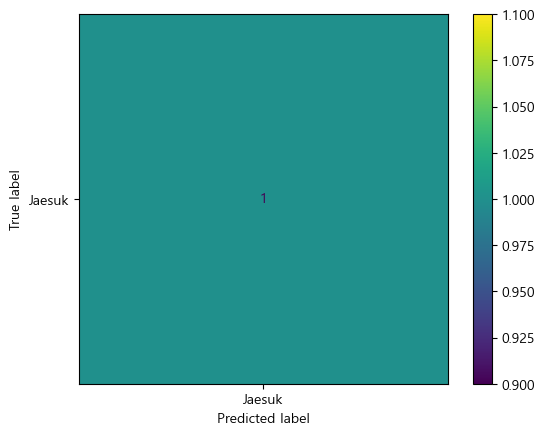

              precision    recall  f1-score   support

      Jaesuk       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


총 소요시간: 0시간 0분 3초
Training complete!


In [6]:
if __name__ == "__main__":
    # STEP 1: Train the KNN classifier and save it to disk
    # Once the model is trained and saved, you can skip this step next time.
    print("Training KNN classifier...")
    
    # train 이미지 각 3장, val 이미지 각 1장
    start_time = time.time()
    classifier = train("train_재석","val_재석",model_save_path="trained_knn_model_재석.clf", n_neighbors=3)
    Total_time = time.time() - start_time # time_taken is in seconds
    hours, rest = divmod(Total_time,3600)
    minutes, seconds = divmod(rest, 60)
    hour = math.trunc(hours)
    minute = math.trunc(minutes)
    second = math.trunc(seconds)
    print("총 소요시간: {}시간 {}분 {}초" .format(hour, minute, second))
    print("Training complete!")


Looking for faces in test.jpg
The test image has a distance of 0.55 from known image #0

The test image has a distance of 0.56 from known image #1

The test image has a distance of 0.48 from known image #2

The test image has a distance of 0.55 from known image #3

총 소요시간: 0시간 0분 11초

- Found unknown at (469, 407)

- Found unknown at (1071, 504)

- Found MoonByul at (1604, 366)

0.886705118203702
MoonByul은 운전자가 맞습니다


C:\Users\user\AppData\Local\Temp\ipykernel_3500\2475866268.py:266: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(encoded_name)
C:\Users\user\AppData\Local\Temp\ipykernel_3500\2475866268.py:266: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(encoded_name)
C:\Users\user\AppData\Local\Temp\ipykernel_3500\2475866268.py:266: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(encoded_name)


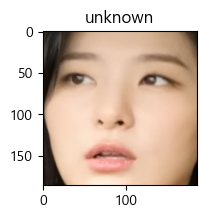

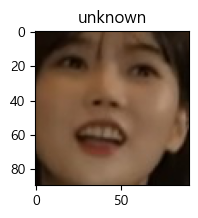

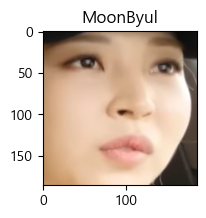

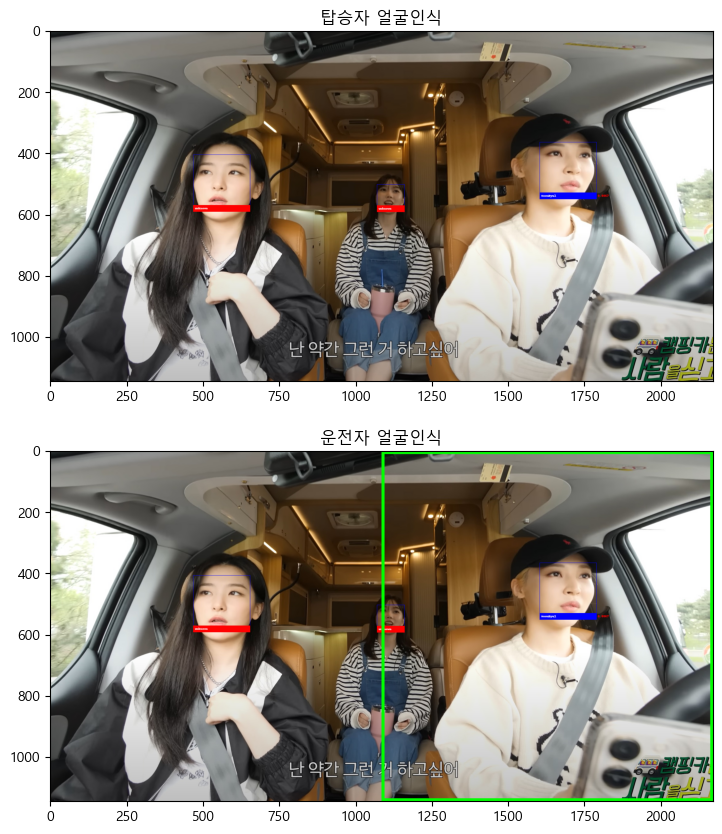

In [15]:
# STEP 2: Using the trained classifier, make predictions for unknown images
for image_file in os.listdir("test"):
    full_file_path = os.path.join("test", image_file)

    print("Looking for faces in {}".format(image_file))

    # Find all people in the image using a trained classifier model
    # Note: You can pass in either a classifier file name or a classifier model instance
    start_time = time.time()
    predictions = predict("train",full_file_path, model_path="trained_knn_model_문별.clf")
    Total_time = time.time() - start_time # time_taken is in seconds
    hours, rest = divmod(Total_time,3600)
    minutes, seconds = divmod(rest, 60)
    hour = math.trunc(hours)
    minute = math.trunc(minutes)
    second = math.trunc(seconds)
    print("총 소요시간: {}시간 {}분 {}초" .format(hour, minute, second))
    print()
    
    # Print results on the console
    for name, (top, right, bottom, left) in predictions:
        print("- Found {} at ({}, {})".format(name, left, top))
        print()

    # Display results overlaid on an image
    show_prediction_labels_on_image(os.path.join("test", image_file), "train", predictions)